In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, Markdown

import pandas as pd
import numpy as np

import json

np.__version__

'1.19.5'

# PREP: data

In [2]:
TO_NUM_CONVERSION = {
    'mixed': 'x',
    'female': 'f',
    'male': 'm',
    'unknown': 'x'
}

In [3]:
gender_df = pd.read_csv('./data/11-OUTPUT-with-gender-from-gpt4.csv')
date_as_decimal = (gender_df.chart_debut_date_normalized_0_to_1 / 100) * (2023 - 1959) + 1959
date_as_decimal
gender_df['date_as_decimal'] = date_as_decimal
gender_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14,m,1975.28800
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14,m,1975.28800
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0,m,1975.28800
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14,m,1975.28800
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0,m,1975.28800
...,...,...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0,m,2021.43968
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0,m,2021.43968
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5,m,2021.43968
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0,m,2021.43968


# PREP: implement dataviz helpers

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:

# unclear if any change
endearments = {"x":[68.41437686488501,70.60785278424815],"y":[37.41337593941116,38.656998447264364]}
hope = {"x":[63.82054821612978,64.7455660983335],"y":[34.10020481305155,34.62465691590811]}
king_and_queen = {"x":[37.16232335742171,39.00723683780778],"y":[47.32136770032542,48.36736775393717]}
this_topic_does_not_matter = {"x":[69.40281662040354,70.7281775003339],"y":[55.34667073773606,56.09810302233943]}

# increases
money = {"x":[44.373966474543344,46.89578417179803],"y":[51.32652039574649,53.620313395218965]}
bling = {"x":[36.830222358561755,38.98558104895179],"y":[50.51323309248308,52.473702590635526]}


# decrease
trains = {"x":[33.81003871731829,35.12548575198946],"y":[44.21206344977864,44.95787493818595]}
mail_letters = {"x":[75.49889146108401,78.36359380070401],"y":[51.102477133812194,52.72666104957888]}
crying = {"x":[47.221939675414774,51.22855843986578],"y":[63.95499696143897,66.2266067073554]}
smooching = {"x":[42.29274375515004,46.38922509120185],"y":[58.50912291912832,60.83168153376482]}
needing = {"x":[57.85203081147183,68.59043312238205],"y":[53.57181173663452,63.01788684302827]} # w/ filter_term="need"

# flashes
the_twist = {"x":[43.44424212685903,45.81103037181394],"y":[27.42601396768172,29.578795397291564]}
independent_woman_island = {"x":[71.20540790090061,72.75890439110405],"y":[59.97026713004826,60.843451387521554]}

# peaks
apology = {"x":[74.22341143872275,76.60246085972018],"y":[54.42211974817969,55.770955803834475]}
lonesomeness = {"x":[46.83177410717391,51.25894554602522],"y":[60.27980592534157,62.78985401790457]}
summer = {"x":[38.33223185597551,39.937022657569045],"y":[56.732321042928035,57.64218011347436]}
heart_and_soul = {"x":[51.29575376990074,54.630406727410495],"y":[63.39077685082963,66.42390792050726]}
heaven = {"x":[41.952352805865246,44.28253666093067],"y":[62.549830960924254,64.66931779776084]}
freedom = {"x":[48.863729693018406,50.7200475836808],"y":[57.927640223430984,59.61610842120449]} # sudden drop
american_south = {"x":[40.30689751115798,41.25062601956011],"y":[40.768192046759836,41.626587896837336]} # has gap
love_lagoon = {"x":[56.88552518777873,67.59223863239565],"y":[57.13397513383038,66.87257930547837]}
cars = {"x":[44.044606219695126,47.000345426390915],"y":[42.78399083352829,44.44534311900742]}

hop_hop_life_in_the_hood = {"x":[39.698309945228786,45.50745922012898],"y":[45.067706350111685,49.010322023657835]}



In [6]:
def filter_to_range(df, lower, upper):
    return df[
        (df.date_as_decimal > lower) &
        (df.date_as_decimal < upper)
    ].sort_values(by=['date_as_decimal'])

# [PERSONAL CONNECTIONS TO THIS PIECE]

### David 

In my own life, I've grabbled with identifying & taking control of the gender roles & views of romance I've been given.

The extend to which I can identify what I really value, what is really healthy for me & my partner, I'm able to thrive.

I'm fascinated to see how the discourse around romance has shifted in the last decades, as culture & generations have changed so much.

I also feel like there's a very trite feeling of, "Songs are about sex & twerking now. The old days were so much simpler, better."

Without trying to attack that directly, I want to dig more deeply into *what* is happening in terms of love songs & non-love songs over time. I think there's an opportunity to see deeper into popular culture, and the shift that's really at play.


### Michelle Jia


# [LINK TO INTERACTIVE LYRIC MAP](https://davidnmora.github.io/lyric-viz/)

# (some misc examples of (maybe?) love songs)

<img src="./images/lesley-gore.png"  width="500">

### 1963 -- Lesley Gore sings "She's A Fool" on The Ed Sullivan Show

It's about waiting patiently for a man to leave a women who doesn't appreciate that her man is 
> the best thing in the whole wide world.

Alas, this man's girlfriend
> doesn't realize she's a lucky girl


<img src="./images/dusty-springfield.png"  width="500">


### ... it was a whole vibe: 1964 Dusty Springfield's  ["Wishin' and hopin'"](https://www.youtube.com/watch?v=vbAoOeXC2Sg) coached women do more than just wait -- they should take initiative to *tailor themselves* for their target man:

> Show him that you care just for him  
Do the things he likes to do  
Wear your hair just for him, 'cause  
You won't get him  
Thinkin' and a-prayin', wishin' and a-hopin'

<img src="./images/latto-big-energy.png"  width="500">

### It's 2021 -- Latto debuts "Big Energy" in a Pop landscape where the way hetero woman express themselves (& target a man) has seemingly transformed:

In it, she fires a cupid arrow at a literal wall of hot guys, while singing

> "Ain't too many n**** who can handle me"

and 

> On the count of three, bad bitches get money (get money)  
> Broke niggas to the left, we 'on't want it (hell nah)  
> If you ever see me broke, I'm prolly rocking a cast  
> Pretty face, no waist, with a big ol' bag, ha





## But also... modern pop can feel, in some ways, not too modern...

1963 Gore sings about hoping her male love interest will someday notice her, that she would be good to him:
> I would never be untrue  
I would never make him blue  
... Maybe then he'll turn to me  

... as does Dusty Springfield:
> Do the things he likes to do  
Wear your hair just for him  

... a sentiment oddly familiar in [2015 Selena Gomez](https://www.youtube.com/watch?v=1TsVjvEkc4s) "Good For You":
> Gonna wear that dress you like, skin-tight  
Do my hair up real, real nice ...  
'Cause I just wanna look good for you, good for you, oh-oh  
Let me show you how proud I am to be yours

2020 Ariana will switch up positions to be good to him -- in the kitchen or the bedroom:

> Switchin' the positions for you  
Cookin' in the kitchen, and I'm in the bedroom  
I'm in the Olympics, way I'm jumpin' through hoops



# In 60 years, have love songs declined? or certain kinds of loves? And if so, what's replaced them, and what artists or genres are behind it?

Let's use wiki's definition

> a love song is a song about  
romantic love,  
falling in love,  
heartbreak after a breakup,  
and the feelings that these experiences bring.


# EXPLORATION: Trying ways of identifying "love songs", and seeing how they've changed (or not)

### NOTE: there's generally a *decline in total unique songs in the Top 10* over time (ie a smaller subset of songs dominate as time goes on)

## *Simplest ID method*: Does at least one lyric in the song contain the word "love"?

In [7]:
IS_LOVE_SONG_COL = 'is_love_song'

def contains_love(lyric_lines):
    # Short-circuit as soon as "love" is found in any lyric line.
    return any('love' in lyric.lower() for lyric in lyric_lines)

def list_unique_songs_labeled_if_they_contain_the_word_love(df):
        # Create a boolean mask indicating whether each lyric line contains "love".
    df['contains_love'] = df['lyric_line'].str.contains('love', case=False)
    
    # Define aggregation functions for each column
    # - 'contains_love' will use 'any' to find if any lyric line contains 'love'
    # - other columns will use 'first' to take the first value from each group
    agg_functions = {col: 'first' for col in df.columns if col not in ['contains_love', 'lyric_line']}
    agg_functions['contains_love'] = 'any'
    
    # Group by 'performer' and 'song' and apply aggregation functions
    result = df.groupby(['performer', 'song']).agg(agg_functions)#.reset_index()
    
    # Rename 'contains_love' column to 'is_love_song'
    result.rename(columns={'contains_love': IS_LOVE_SONG_COL}, inplace=True)
    
    return result.reset_index(drop=True)

# Example DataFrame with additional columns
data = {
    'lyric_line': ['I love you', 'This is a test', 'Love is in the air', 'No mentions here', 'Love', 'Something else'],
    'performer': ['Artist1', 'Artist1', 'Artist2', 'Artist2', 'Artist3', 'Artist3'],
    'song': ['Song1', 'Song1', 'Song2', 'Song2', 'Song3', 'Song3'],
    'album': ['Album1', 'Album1', 'Album2', 'Album2', 'Album3', 'Album3'],
    'year': [2000, 2000, 2005, 2005, 2010, 2010]
}

# Create DataFrame
df = pd.DataFrame(data)

# Transform DataFrame
list_unique_songs_labeled_if_they_contain_the_word_love(df)

,performer,song,album,year,is_love_song
0,Artist1,Song1,Album1,2000,True
1,Artist2,Song2,Album2,2005,True
2,Artist3,Song3,Album3,2010,True


In [8]:
ENTIRE_CHART_BBOX = {"x":[-2.862627270141111,126.29481148663372],"y":[12.152482533476716,85.38013754289815]}
MIN_YEAR = 1958
MAX_YEAR = 2023
NUM_BINS = (MAX_YEAR - MIN_YEAR) 

def viz_love_song_density_by_gender(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    # ONLY USE LOVE SONGS
    filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.is_love_song == True]
    male = filtered_to_bbox[filtered_to_bbox.gender == 'm']
    female = filtered_to_bbox[filtered_to_bbox.gender == 'f']
#     mixed = filtered_to_bbox[filtered_to_bbox.gender == 'x']

    if subplot:
        plt.subplot(subplot)
    sns.distplot(male.date_as_decimal, bins=NUM_BINS, color='blue')
    sns.distplot(female.date_as_decimal, bins=NUM_BINS, color='pink')
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    plt.title('Love songs *density*, by gender')
    return filtered_to_bbox
    

def viz_love_song_absolute_by_gender(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
     # ONLY USE LOVE SONGS
    filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.is_love_song == True]
    
    if subplot:
        plt.subplot(subplot)
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    # Define color palette
    palette = {"m": "blue", "f": "pink", "x": "gray"}

    # Use this palette in your plot
    sns.histplot(data=filtered_to_bbox, x="date_as_decimal", 
                 kde=True, hue="gender", palette=palette, alpha=0.7, bins=NUM_BINS, hue_order = ["x",  "f", "m"])
    plt.title('Love songs count, by gender')
    return filtered_to_bbox

def viz_bbox_absolute_NO_GENDER_SPLIT(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    
    if subplot:
        plt.subplot(subplot)
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    # Define color palette
#     palette = {"m": "blue", "f": "pink", "x": "gray"}

    # Use this palette in your plot
    sns.histplot(data=filtered_to_bbox, x="date_as_decimal", 
                 kde=True, hue="is_love_song", 
#                  palette=palette, 
                 alpha=0.7, bins=NUM_BINS)
    plt.title('Love songs VS Not Love Songs count (not split by gender)')
    return filtered_to_bbox

def viz_both_charts(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term=''):
    plt.figure(figsize=(20,15))   
    viz_bbox_absolute_NO_GENDER_SPLIT(viz_ready, bbox, filter_term, 311)
    viz_love_song_density_by_gender(viz_ready, bbox, filter_term, 312)
    viz_love_song_absolute_by_gender(viz_ready, bbox, filter_term, 313)
    plt.show()
    return viz_ready[['performer', 'song', 'is_love_song', 'generic_genre', 'date_as_decimal', 'gender']]


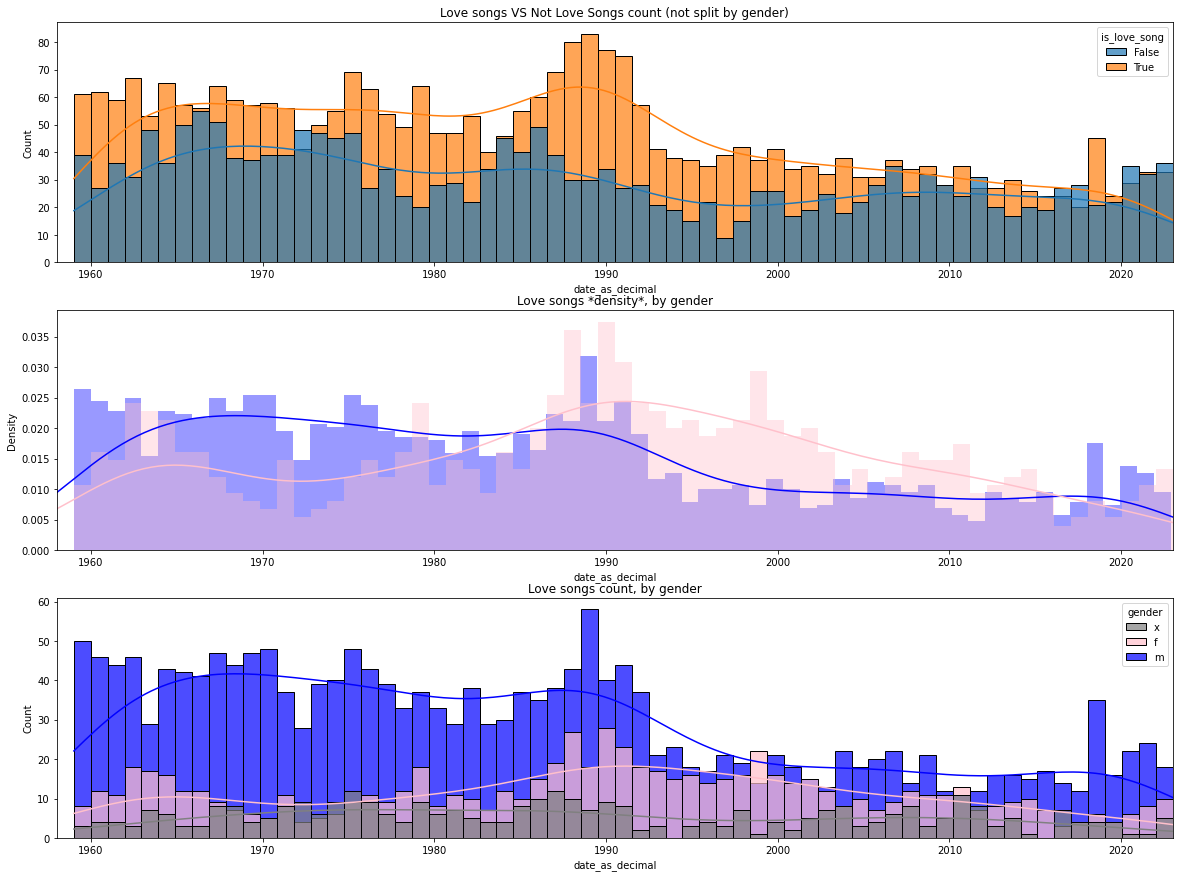

,performer,song,is_love_song,generic_genre,date_as_decimal,gender
0,"""Weird Al"" Yankovic",White & Nerdy,False,ROCK,2006.90080,m
1,'N Sync,(God Must Have Spent) A Little More Time On You,True,POP,1999.09920,m
2,'N Sync,Bye Bye Bye,True,POP,2000.24224,m
3,'N Sync,It's Gonna Be Me,True,POP,2000.51040,m
4,'N Sync,This I Promise You,True,POP,2000.90784,m
...,...,...,...,...,...,...
5011,matchbox twenty,Unwell,False,ROCK,2003.36288,m
5012,twenty one pilots,Heathens,True,ROCK,2016.58016,m
5013,twenty one pilots,Ride,False,ROCK,2016.31200,m
5014,twenty one pilots,Stressed Out,False,ROCK,2015.43712,m


In [9]:
contains_love_df = list_unique_songs_labeled_if_they_contain_the_word_love(gender_df)
contains_love_df
viz_both_charts(contains_love_df)

In [10]:
contains_love_df.head(100)[[IS_LOVE_SONG_COL, 'performer', 'song']]

,is_love_song,performer,song
0,False,"""Weird Al"" Yankovic",White & Nerdy
1,True,'N Sync,(God Must Have Spent) A Little More Time On You
2,True,'N Sync,Bye Bye Bye
3,True,'N Sync,It's Gonna Be Me
4,True,'N Sync,This I Promise You
...,...,...,...
95,True,After 7,Can't Stop
96,True,After 7,Ready Or Not
97,False,After The Fire,Der Kommissar
98,True,Air Supply,All Out Of Love


### To verify how good our "is a love song metric is", let's create a test set that's by hand.

In [13]:
VALIDATION_SET_ROWS = [
    # Clear NO
    [False, 'twenty one pilots', 'Heathens'], 
    [False, '"Weird Al" Yankovic', 'White & Nerdy'],
    [False, 'will.i.am & Britney Spears','Scream & Shout'],
    [False, '100 Proof Aged in Soul', "Somebody's Been Sleeping"], # he can see someone's been cheating on him
    [False, "21 Savage & Metro Boomin", "Runnin"], # gangster rap
    [False, "50 Cent", "Disco Inferno"], # "shake that ass, but your back into it" summarizes this song    
    [False, "6ix9ine Featuring Nicki Minaj & Murda Beatz", "FEFE"], # really just about sexual prowess (and being dangerous, a little)
    
    # Clear YES
    [True,"'N Sync", 'This I Promise You'], # promising to always love someone
    [True, "'N Sync Featuring Nelly", "Girlfriend"], # praising the woman's beauty & life-changing love, asking her to be your girlfriend
    [True, "'N Sync & Gloria Estefan", "Music Of My Heart"], # gratitude for how a lover has opened them up & changed them
    [True, '702',"Get It Together"], # a song about being taken for granted, conflict in romance, wishing it could be fixed  
    
    # Of note, NO
    [False, '2Pac', "Dear Mama/Old School"], # love for his mother, not romantic love
    [False, "24kGoldn Featuring iann dior", "Mood"], # song telling his girlfriend no to be so moody

    # Of note, YES    
    [True, "112", "Peaches & Cream"], # it's a song about sex & being "addicted" to a "tasty" woman
    [True, '10cc', "The Things We Do For Love"], # talks about the hardships of romance, but ultimately says "you make me love you"
    [True, "10cc","I'm Not In Love"], # the title is ironic -- he's actually in love with her (his wife)
    [True, "50 Cent Featuring Nate Dogg", "21 Questions"], # asking his girl if she'd stick with him no matter what
]

In [14]:
def test_against_validation_set(df):
    num_wrong = 0
    for is_love_song, performer, song in VALIDATION_SET_ROWS:
        data_val = df.set_index(['performer', 'song']).loc[(performer, song)].is_love_song
        if data_val != is_love_song:
            num_wrong = num_wrong + 1
            print('FAILED: performer: ', performer, 'song:', song, 'SHOULD BE:', is_love_song)
    print(f'{num_wrong} wrong out of {len(VALIDATION_SET_ROWS)} total')

test_against_validation_set(contains_love_df)

FAILED: performer:  twenty one pilots song: Heathens SHOULD BE: False
FAILED: performer:  21 Savage & Metro Boomin song: Runnin SHOULD BE: False
FAILED: performer:  2Pac song: Dear Mama/Old School SHOULD BE: False
FAILED: performer:  24kGoldn Featuring iann dior song: Mood SHOULD BE: False
4 wrong out of 17 total
